In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the TXT file into a DataFrame (change the separator if needed)
df = pd.read_csv("occurrence.txt", sep="\t", low_memory=False)

# df = pd.read_csv("occurrence.txt", sep="\t")  # Use sep="," for comma or sep=" " for space


# Save the DataFrame to a CSV file
df.to_csv("output1.csv", index=False)


In [44]:
# Load the dataset
file_path = 'output1.csv'  # Replace with your file path
data = pd.read_csv(file_path,low_memory=False)

In [45]:
# Step 2: Select the Required Columns
selected_columns = [
    'year', 'continent', 'countryCode', 
    'stateProvince', 'decimalLatitude', 'decimalLongitude', 
     'coordinateUncertaintyInMeters', 'coordinatePrecision', 'infraspecificEpithet',
    'elevation','elevationAccuracy', 'depth', 'depthAccuracy','distanceFromCentroidInMeters', 'gbifRegion','level0Gid','level0Name'
]

data_v2 = data[selected_columns]
# Step 3: Save to New CSV File
data_v2.to_csv('data_v2.csv', index=False)

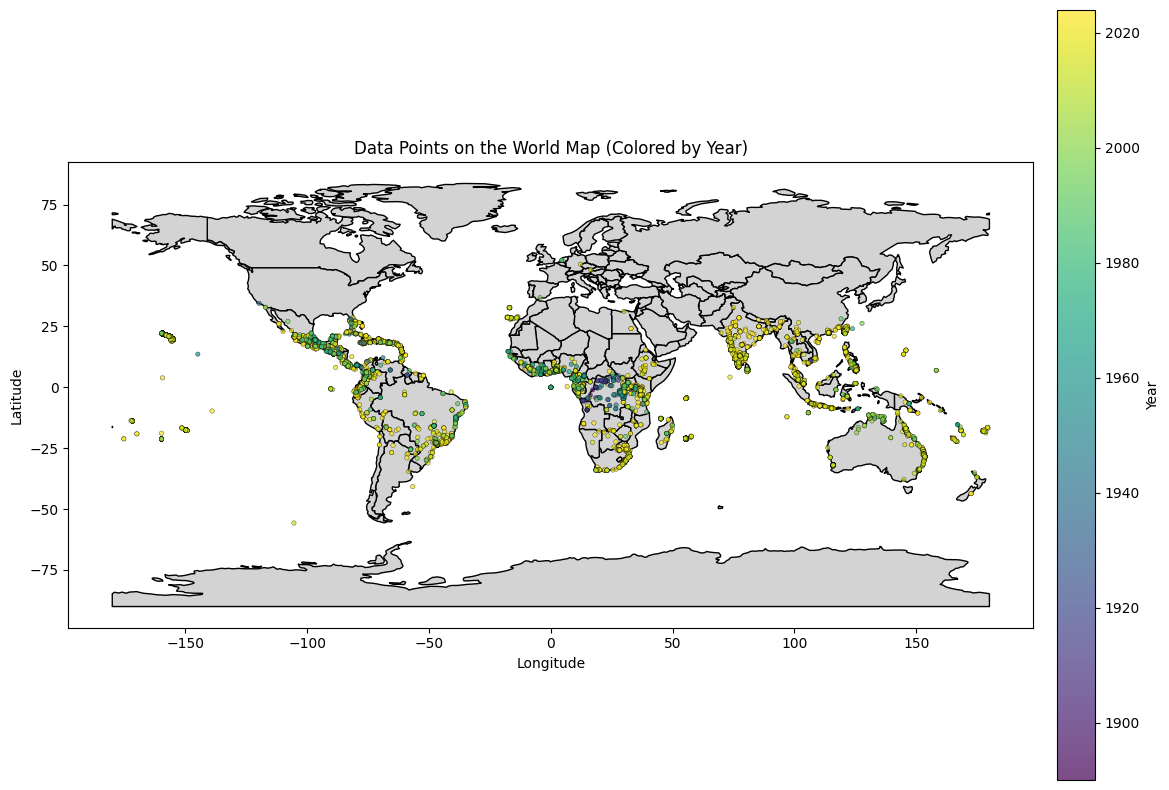

             count   mean_lat    mean_lon
countryCode                              
IN            2226  12.250556   76.813678
US             993  21.262140 -152.797592
AU             755 -26.038144  141.283196
TW             509  23.231269  120.514399
BR             481 -20.493002  -45.337829
...            ...        ...         ...
ST               1   0.302549    6.692113
SB               1  -9.467056  159.940194
SS               1   4.866678   31.595643
SX               1  18.052812  -63.017360
SR               1   5.816630  -55.582234

[127 rows x 3 columns]


In [10]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# # Load the world map shapefile from the local path
# # Update the path below with the location of your downloaded and extracted shapefile
# world = gpd.read_file('ne_110m_admin_0_countries.shp')

# # Now continue with plotting or processing as usual
# # print(data_v1.columns)
# # print(type('decimalLatitude'))
# data_v2_filtered = data_v2.dropna(subset=['decimalLatitude', 'decimalLongitude']).copy()
# # # Ensure `data_v1` has your data filtered by columns, including decimalLatitude and decimalLongitude
# # # Convert data_v1 to a GeoDataFrame using latitude and longitude for geometry
# # gdf = gpd.GeoDataFrame(
# #     data_v1.dropna(subset=['decimalLatitude', 'decimalLongitude']),
# #     geometry=gpd.points_from_xy(data_v1['decimalLongitude'], data_v1['decimalLatitude']),
# #     crs="EPSG:4326"  # Common coordinate reference system for latitude/longitude
# # )
# data_v2_filtered.loc[:, 'geometry'] = gpd.points_from_xy(data_v2_filtered['decimalLongitude'], data_v2_filtered['decimalLatitude'])
# gdf = gpd.GeoDataFrame(data_v2_filtered, geometry='geometry', crs="EPSG:4326")

# # Set up the colormap based on the year
# fig, ax = plt.subplots(figsize=(15, 10))
# world.plot(ax=ax, color='lightgrey', edgecolor='black')

# # Plot the points with a color scale for year
# gdf.plot(ax=ax, column='year', cmap='viridis', markersize=5, legend=True)

# plt.title("Data Points on the World Map (Colored by Year)")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Load the world map shapefile
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Remove rows with missing coordinates and convert to GeoDataFrame
data_v2_filtered = data_v2.dropna(subset=['decimalLatitude', 'decimalLongitude']).copy()
data_v2_filtered['geometry'] = gpd.points_from_xy(data_v2_filtered['decimalLongitude'], data_v2_filtered['decimalLatitude'])
gdf = gpd.GeoDataFrame(data_v2_filtered, geometry='geometry', crs="EPSG:4326")

# Set up the colormap based on the year and create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Use a scatter plot to customize marker size and transparency
sc = ax.scatter(
    gdf['decimalLongitude'], 
    gdf['decimalLatitude'], 
    c=gdf['year'], 
    cmap='viridis', 
    s=10,         # Marker size
    alpha=0.7,    # Marker transparency
    edgecolor='black', linewidth=0.3  # Outline for markers for better visibility
)

# Add a color bar for the year column
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Year")

# Set title and labels
plt.title("Data Points on the World Map (Colored by Year)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


region_summary = gdf.groupby('countryCode').agg(
    count=('year', 'size'),
    mean_lat=('decimalLatitude', 'mean'),
    mean_lon=('decimalLongitude', 'mean')
).sort_values(by='count', ascending=False)

print(region_summary)
#country vs year and countries

# top_locations = gdf.groupby(['decimalLatitude', 'decimalLongitude']).size().reset_index(name='Frequency')
# top_locations_sorted = top_locations.sort_values(by='Frequency', ascending=False).head(10)

# import tabulate
# print(tabulate(top_locations_sorted, headers='keys', tablefmt='pretty'))

# region_summary = gdf.groupby('region').agg(
#     count=('year', 'size'),
#     mean_lat=('decimalLatitude', 'mean'),
#     mean_lon=('decimalLongitude', 'mean')
# ).sort_values(by='count', ascending=False)

# print(region_summary)



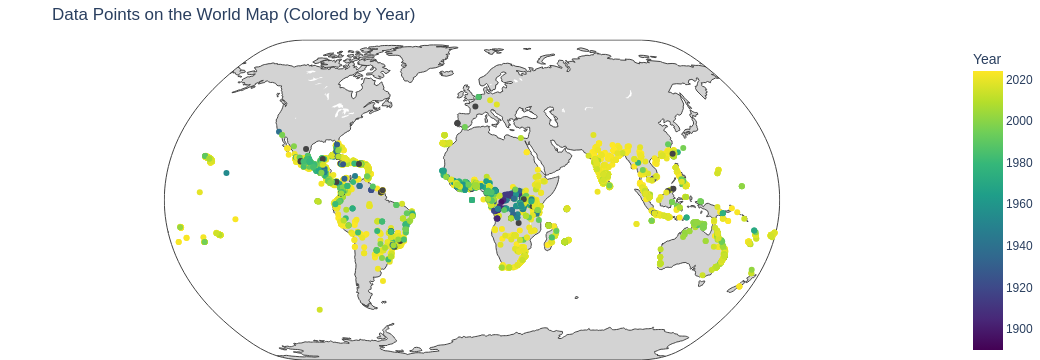

interactive(children=(IntRangeSlider(value=(1890, 2024), continuous_update=False, description='Year Range:', m…

In [11]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

# Convert the GeoDataFrame to a DataFrame for Plotly
data_for_plotly = gdf[['decimalLongitude', 'decimalLatitude', 'year']]

# Create an interactive scatter plot using Plotly Express
fig = px.scatter_geo(
    data_for_plotly, 
    lon='decimalLongitude', 
    lat='decimalLatitude', 
    color='year', 
    hover_name='year', 
    projection="natural earth",
    color_continuous_scale='viridis', 
    title="Data Points on the World Map (Colored by Year)"
)

# Update layout to customize the appearance
fig.update_layout(
    geo=dict(showland=True, landcolor="lightgrey"),
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Year")
)

fig.show()


# Dropdown widget for selecting a year range
year_selector = widgets.IntRangeSlider(
    value=[gdf['year'].min(), gdf['year'].max()],
    min=gdf['year'].min(),
    max=gdf['year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False
)

# Function to update the plot based on selected years
def update_map(year_range):
    filtered_gdf = gdf[(gdf['year'] >= year_range[0]) & (gdf['year'] <= year_range[1])]
    
    fig = px.scatter_geo(
        filtered_gdf, 
        lon='decimalLongitude', 
        lat='decimalLatitude', 
        color='year', 
        hover_name='year', 
        projection="natural earth",
        color_continuous_scale='viridis', 
        title=f"Data Points on the World Map ({year_range[0]} - {year_range[1]})"
    )

    fig.update_layout(
        geo=dict(showland=True, landcolor="lightgrey"),
        coloraxis_colorbar=dict(title="Year")
    )

    fig.show()

# Link the slider to the update function
widgets.interactive(update_map, year_range=year_selector)


In [22]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

# Dropdown widget for selecting a year range
year_selector = widgets.IntRangeSlider(
    value=[gdf['year'].min(), gdf['year'].max()],
    min=gdf['year'].min(),
    max=gdf['year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False
)

# Function to update the plot based on selected years
def update_map(year_range):
    # Filter data for selected year range
    filtered_gdf = gdf[(gdf['year'] >= year_range[0]) & (gdf['year'] <= year_range[1])]
    
    # Calculate the number of occurrences based on 'level0name' (country name)
    occurrences = filtered_gdf.groupby('level0Name').size().reset_index(name='occurrences')
    
    # Merge occurrences back into the filtered GeoDataFrame
    filtered_gdf = pd.merge(filtered_gdf, occurrences, on='level0Name', how='left')
    
    # Create the plot with color scale for occurrences
    fig = px.scatter_geo(
        filtered_gdf, 
        lon='decimalLongitude', 
        lat='decimalLatitude', 
        color='occurrences', 
        hover_name='level0Name',  # Hover shows the country (level0name)
        hover_data={'stateProvince': False, 'occurrences': True, 'year': True},  # Show stateProvince, occurrences, and year
        projection="natural earth",
        color_continuous_scale='Plasma',  # Choose a different color scale for occurrences
        title=f"Data Points on the World Map ({year_range[0]} - {year_range[1]}) Colored by Occurrences"
    )

    # Update layout to customize size and appearance, and add color scale on the right
    fig.update_layout(
        geo=dict(showland=True, landcolor="lightgrey"),
        coloraxis_colorbar=dict(
            title="Occurrences",  # Title for the color scale
            tickvals=[filtered_gdf['occurrences'].min(), filtered_gdf['occurrences'].max()],
            ticktext=[f"{filtered_gdf['occurrences'].min()}", f"{filtered_gdf['occurrences'].max()}"],  # Display min and max values on color scale
            tickmode="array",
        ),
        height=800,  # Increase height for better visibility
        width=1200   # Increase width
    )

    # Show the plot
    fig.show()

# Link the slider to the update function
widgets.interactive(update_map, year_range=year_selector)


interactive(children=(IntRangeSlider(value=(1890, 2024), continuous_update=False, description='Year Range:', m…

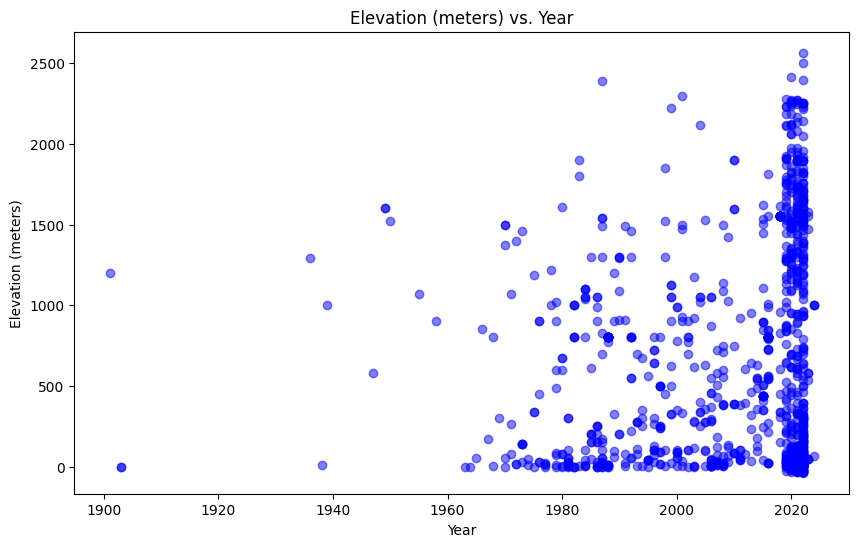

In [47]:
#plot of elevation vs year
plt.figure(figsize=(10, 6))
plt.scatter(data_v2_filtered['year'], data_v2_filtered['elevation'], alpha=0.5, color='blue')
plt.title("Elevation (meters) vs. Year")
plt.xlabel("Year")
plt.ylabel("Elevation (meters)")
plt.show()


Region: OCEANIA, Elevation data count: 76
Region: ASIA, Elevation data count: 50
Region: AFRICA, Elevation data count: 263
Region: LATIN_AMERICA, Elevation data count: 740
Region: NORTH_AMERICA, Elevation data count: 67


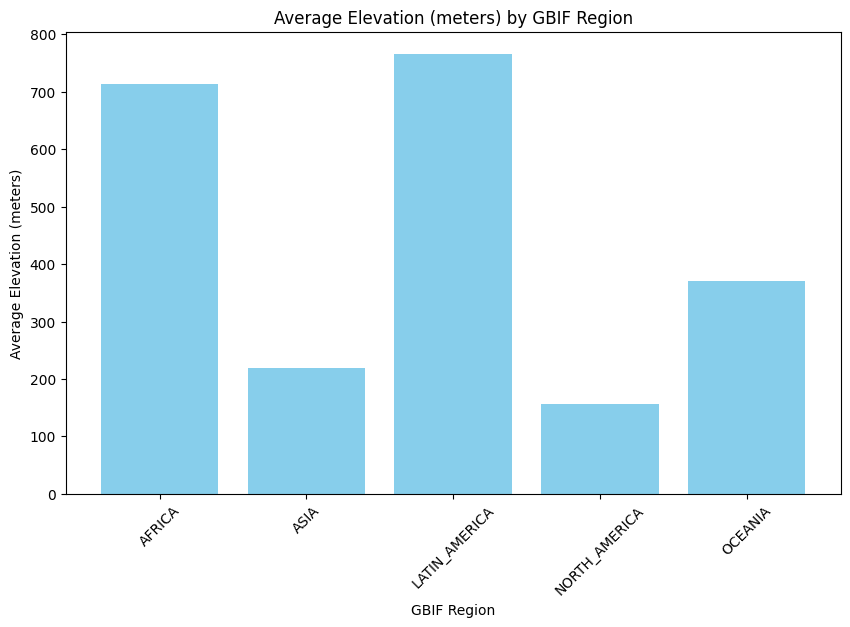

In [48]:
#plot elevation vs gbifRegion
# plt.figure(figsize=(10, 6))
# plt.plot(data_v2_filtered['year'], data_v2_filtered['elevation'], marker='o', color='blue', linestyle='-')
# plt.title("Elevation (meters) vs. Year")
# plt.xlabel("Year")
# plt.ylabel("Elevation (meters)")
# plt.show()
# Filter out any rows with missing elevation or gbifRegion values
data_v2_filtered = data_v2_filtered.dropna(subset=['elevation', 'gbifRegion'])

# Print unique regions and their respective elevation data to check for data integrity
for region in data_v2_filtered['gbifRegion'].unique():
    print(f"Region: {region}, Elevation data count: {data_v2_filtered[data_v2_filtered['gbifRegion'] == region]['elevation'].count()}")
    # Calculate the average elevation for each GBIF region
avg_elevation_per_region = data_v2_filtered.groupby('gbifRegion')['elevation'].mean()
# Plot the average elevation by GBIF region as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_elevation_per_region.index, avg_elevation_per_region.values, color='skyblue')
plt.title("Average Elevation (meters) by GBIF Region")
plt.xlabel("GBIF Region")
plt.ylabel("Average Elevation (meters)")
plt.xticks(rotation=45)
plt.show()




# plt.figure(figsize=(10, 6))
# plt.scatter(data_v2_filtered['year'], data_v2_filtered['elevation'], alpha=0.5, color='blue')
# plt.title("Elevation (meters) vs. Year")
# plt.xlabel("Year")
# plt.ylabel("Elevation (meters)")
# plt.show()


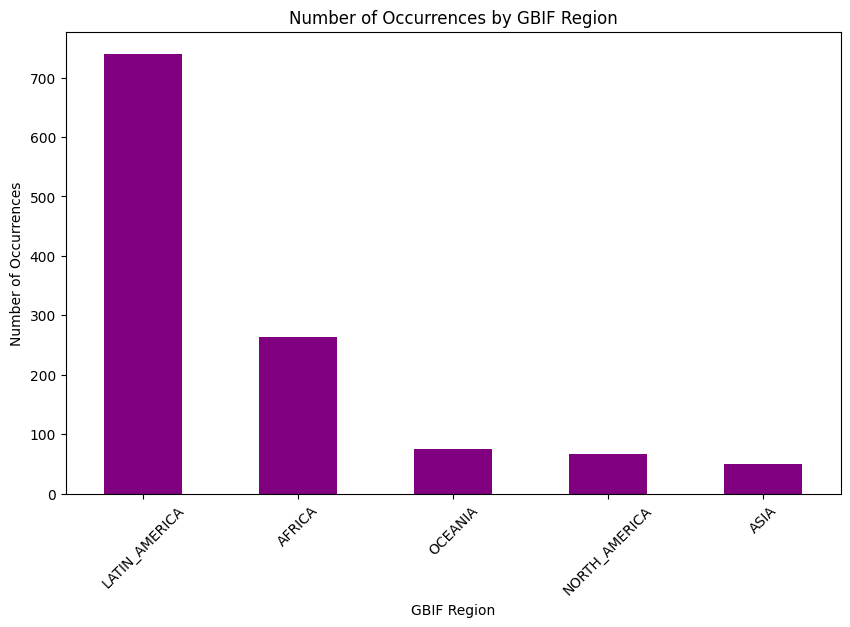

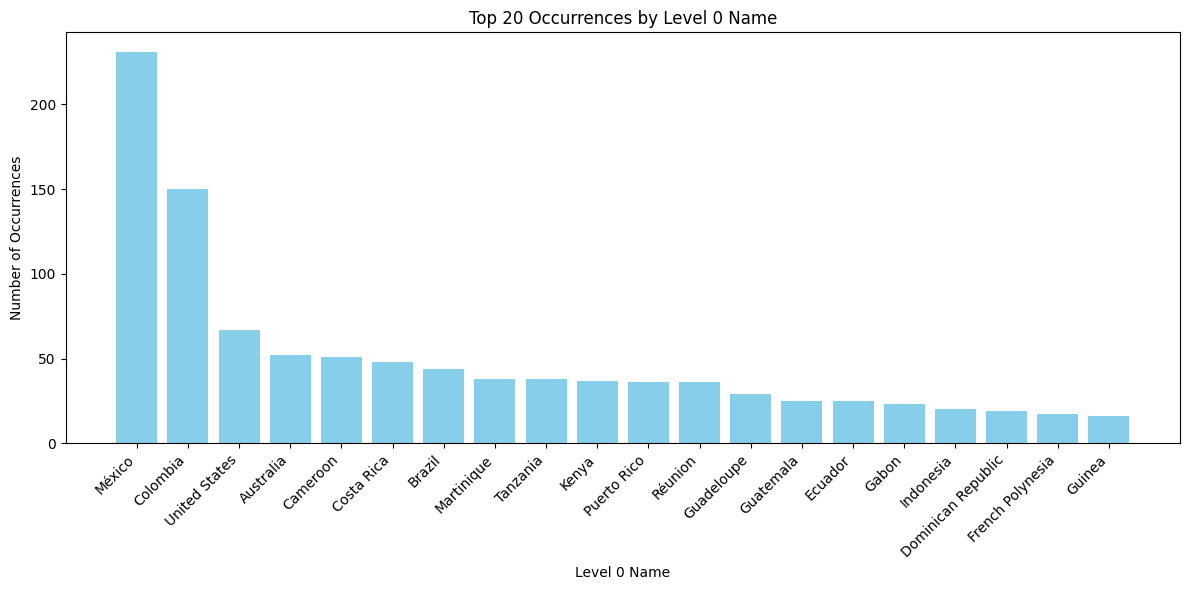

In [49]:
#plot gbifRegion vs number of occurences
plt.figure(figsize=(10, 6))
data_v2_filtered['gbifRegion'].value_counts().plot(kind='bar', color='purple')
plt.title("Number of Occurrences by GBIF Region")
plt.xlabel("GBIF Region")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.show()

#plot level)name vs occurences

# Remove rows with missing values in 'level0name' column
data_v2_filtered_clean = data_v2_filtered.dropna(subset=['level0Name'])

# Calculate the number of occurrences for each level0name
occurrences_per_level0name = data_v2_filtered_clean['level0Name'].value_counts()

# Select the top 20 level0names based on occurrences
top_20_occurrences = occurrences_per_level0name.head(20)

# Plot the top 20 occurrences as a bar chart with a mild color
plt.figure(figsize=(12, 6))
plt.bar(top_20_occurrences.index, top_20_occurrences.values, color='skyblue')  # Mild color

# Set title and labels
plt.title("Top 20 Occurrences by Level 0 Name")
plt.xlabel("Level 0 Name")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels


plt.show()


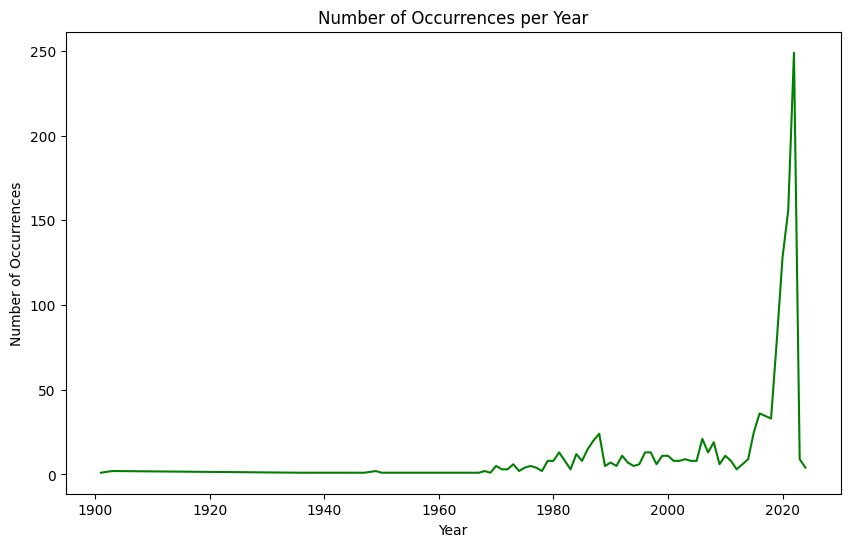

In [50]:
#plot year vs number of occurences
plt.figure(figsize=(10, 6))
data_v2_filtered['year'].value_counts().sort_index().plot(kind='line', color='green')
plt.title("Number of Occurrences per Year")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.show()


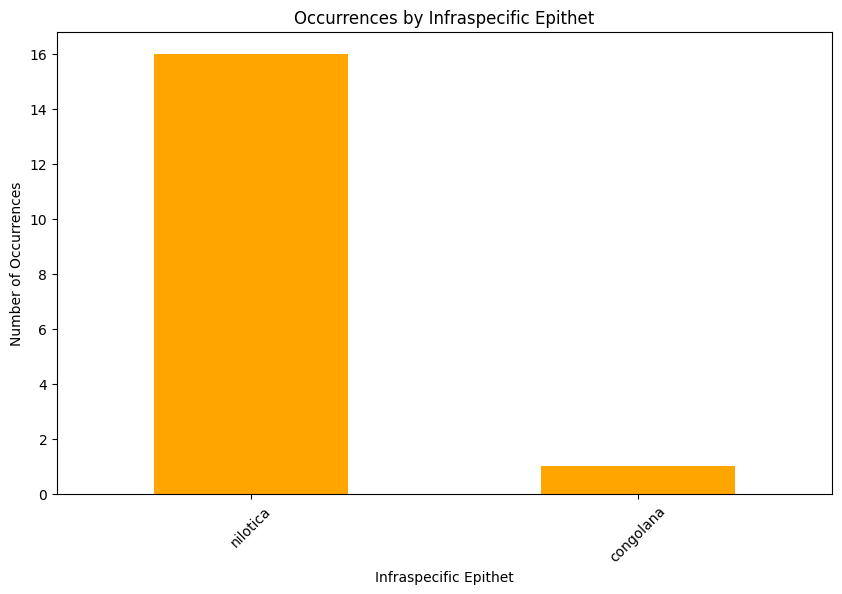

In [51]:
# plot the infraspecific epithet
plt.figure(figsize=(10, 6))
data_v2_filtered['infraspecificEpithet'].value_counts().plot(kind='bar', color='orange')
plt.title("Occurrences by Infraspecific Epithet")
plt.xlabel("Infraspecific Epithet")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.show()


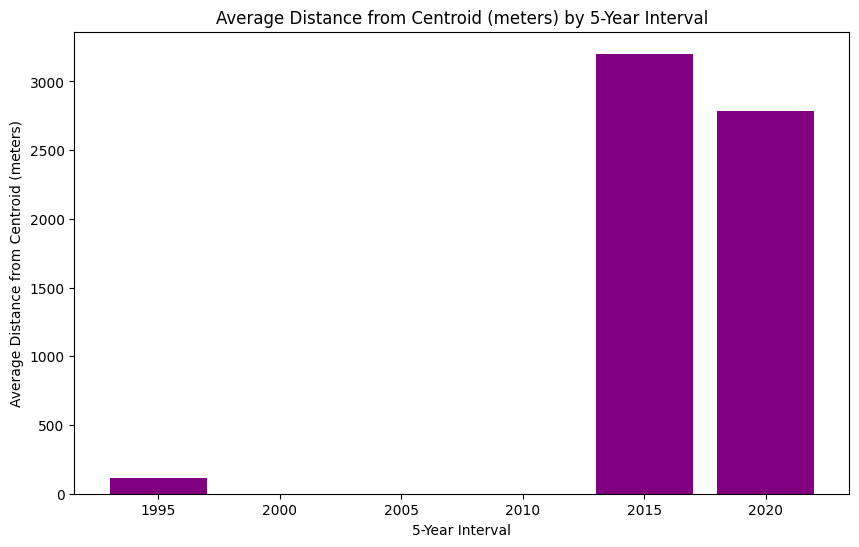

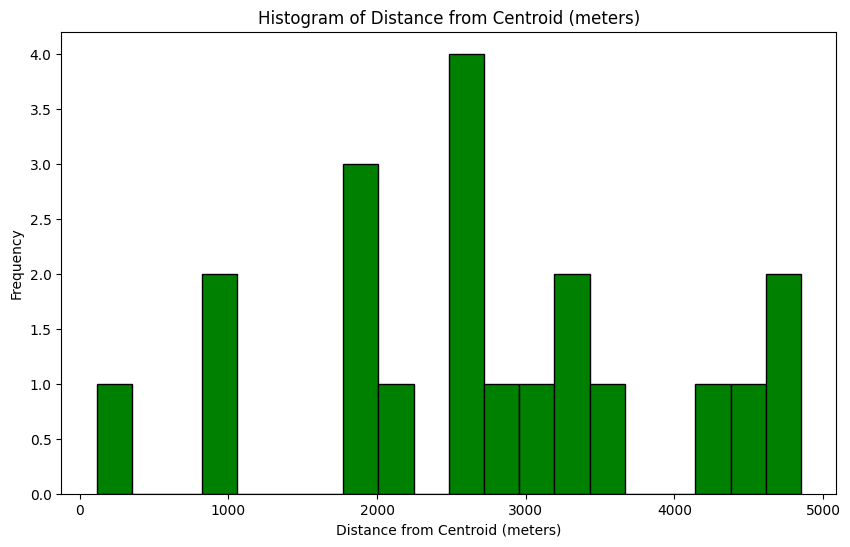

In [52]:
#plot distance from centroid in meters
# Sort data_v2_filtered by 'year'
data_sorted_by_year = data_v2_filtered.sort_values(by='year')
# Create a new column for 5-year intervals
data_v2_filtered['year_interval'] = (data_v2_filtered['year'] // 5) * 5

# # Calculate the average distance from centroid for each year
# avg_distance_per_year = data_v2_filtered.groupby('year')['distanceFromCentroidInMeters'].mean()
# Group by the 5-year intervals and calculate the mean distance
avg_distance_per_interval = data_v2_filtered.groupby('year_interval')['distanceFromCentroidInMeters'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_distance_per_interval.index, avg_distance_per_interval.values, width=4, color='purple')  # Width set to 4 for clarity
plt.title("Average Distance from Centroid (meters) by 5-Year Interval")
plt.xlabel("5-Year Interval")
plt.ylabel("Average Distance from Centroid (meters)")
plt.show()


# Plot distance from centroid sorted by year as a line chart
plt.figure(figsize=(10, 6))
plt.hist(data_v2_filtered['distanceFromCentroidInMeters'], bins=20, color='green', edgecolor='black')
plt.title("Histogram of Distance from Centroid (meters)")
plt.xlabel("Distance from Centroid (meters)")
plt.ylabel("Frequency")
plt.show()



/tmp/ipykernel_26414/2372615457.py:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf.geometry.unary_union.centroid


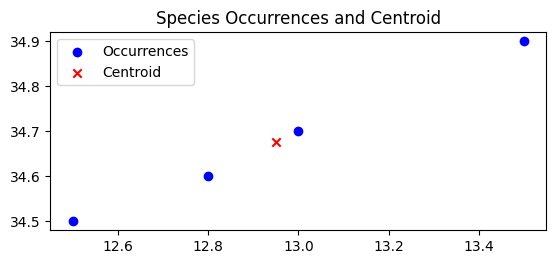

Centroid: POINT (12.95 34.675)
Distances to Centroid (meters):
     species  distance_to_centroid
0  species_1              0.482830
1  species_1              0.055902
2  species_1              0.167705
3  species_1              0.594243


In [2]:
# How to Analyze Centroid Distance:

# Distribution pattern: Use the centroid distance to assess whether a species is concentrated in a particular area or has a wide geographic range.
# Geospatial analysis: You can visualize species occurrences using mapping software (e.g., GIS tools) to calculate centroid distances from a specific point (e.g., a country or conservation area).
# Relationship with habitat: Combine centroid distance with environmental data to see if certain areas (e.g., habitats, protected zones) have a higher concentration of species.
# Cluster analysis: Use spatial analysis techniques like kernel density estimation (KDE) to determine whether species are more likely to occur near their centroid or further away.
# !pip install geopandas shapely scipy matplotlib seaborn
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

# Sample data: a list of species occurrence coordinates (longitude, latitude)
data = {'species': ['species_1', 'species_1', 'species_1', 'species_1'],
        'longitude': [12.5, 13.0, 12.8, 13.5],
        'latitude': [34.5, 34.7, 34.6, 34.9]}

# Create a GeoDataFrame from the data
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']))

# Calculate the centroid of the species occurrences
centroid = gdf.geometry.unary_union.centroid

# Calculate the distance from each occurrence to the centroid (in meters)
gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)

# Plotting species occurrences and centroid
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='blue', label='Occurrences')
ax.scatter(centroid.x, centroid.y, color='red', marker='x', label='Centroid')
ax.set_title("Species Occurrences and Centroid")
ax.legend()
plt.show()

# Print centroid and distances
print(f"Centroid: {centroid}")
print("Distances to Centroid (meters):")
print(gdf[['species', 'distance_to_centroid']])



In [3]:
# geospatial analysis for the above part
# Assuming you have a shapefile for a country or conservation area
# Load the shapefile
conservation_area = gpd.read_file("conservation_area_shapefile.shp")

# Check if the centroid lies within the conservation area
within_area = conservation_area.contains(centroid)

# Plotting the map with occurrences and conservation area
fig, ax = plt.subplots()
conservation_area.plot(ax=ax, color='lightgreen', label="Conservation Area")
gdf.plot(ax=ax, color='blue', label='Occurrences')
ax.scatter(centroid.x, centroid.y, color='red', marker='x', label='Centroid')
ax.set_title("Species Occurrences and Centroid with Conservation Area")
ax.legend()
plt.show()

# Print whether centroid is inside the conservation area
print("Is Centroid within Conservation Area?", within_area)


DataSourceError: conservation_area_shapefile.shp: No such file or directory

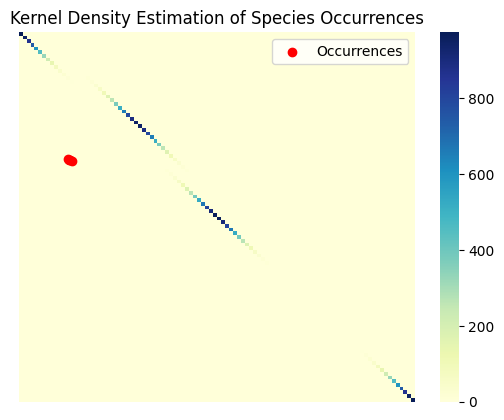

In [4]:
# cluster analysis
import seaborn as sns
from scipy.stats import gaussian_kde

# KDE Analysis on occurrence coordinates
coords = np.vstack([gdf.geometry.x, gdf.geometry.y])
kde = gaussian_kde(coords, bw_method=0.1)  # Adjust bandwidth to control smoothness

# Create a grid for KDE evaluation
x_min, x_max = gdf.geometry.x.min(), gdf.geometry.x.max()
y_min, y_max = gdf.geometry.y.min(), gdf.geometry.y.max()

x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])
density = kde(grid_coords).reshape(x_grid.shape)

# Plot the density estimation (KDE)
fig, ax = plt.subplots()
sns.heatmap(density, xticklabels=False, yticklabels=False, cmap="YlGnBu", ax=ax)
ax.scatter(gdf.geometry.x, gdf.geometry.y, color='red', label='Occurrences')
ax.set_title("Kernel Density Estimation of Species Occurrences")
ax.legend()
plt.show()


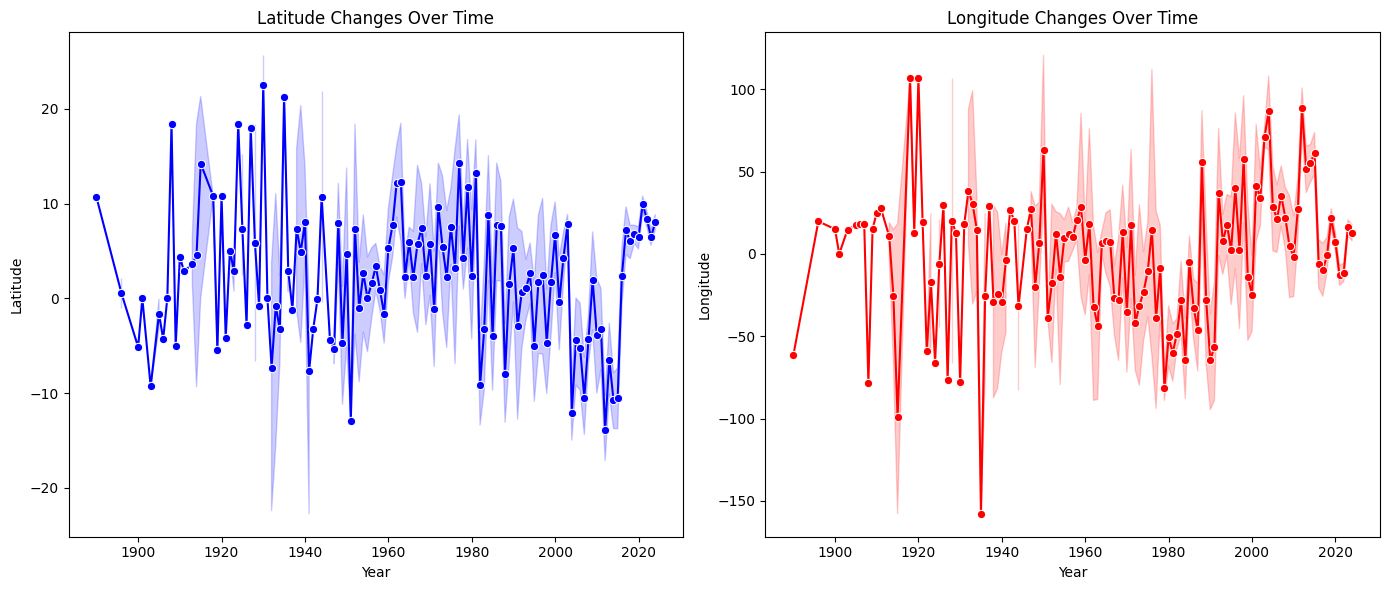

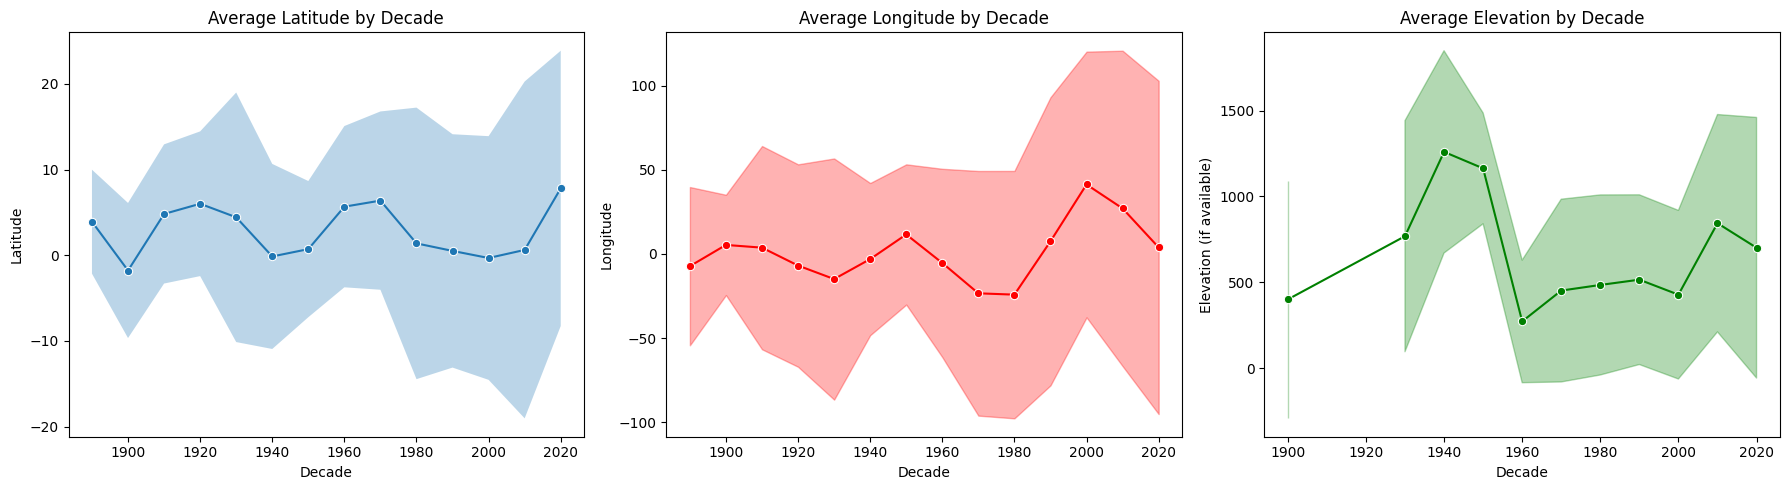

In [1]:
# Temporal Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_v2.csv'
data = pd.read_csv(file_path)

# Ensure 'year' is an integer (drop rows where 'year' is NaN)
data = data.dropna(subset=['year'])
data['year'] = data['year'].astype(int)

# Drop rows with NaN in 'decimalLatitude' and 'decimalLongitude' for spatial analysis
data = data.dropna(subset=['decimalLatitude', 'decimalLongitude'])

## 1. Trend of Migration Over Time ##
# Plotting latitude and longitude over time to see directional migration

plt.figure(figsize=(14, 6))

# Subplot for Latitude over Time
plt.subplot(1, 2, 1)
sns.lineplot(data=data, x='year', y='decimalLatitude', marker='o', color='b')
plt.title('Latitude Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Latitude')

# Subplot for Longitude over Time
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='year', y='decimalLongitude', marker='o', color='r')
plt.title('Longitude Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Longitude')

plt.tight_layout()
plt.show()

## 2. Decade-Level Analysis ##
# Creating a 'decade' column
data['decade'] = (data['year'] // 10) * 10

# Aggregating data by decade
decade_agg = data.groupby('decade').agg({
    'decimalLatitude': ['mean', 'std'],
    'decimalLongitude': ['mean', 'std'],
    'elevation': ['mean', 'std']
}).reset_index()

# Flattening the MultiIndex columns
decade_agg.columns = ['decade', 'lat_mean', 'lat_std', 'lon_mean', 'lon_std', 'elev_mean', 'elev_std']

# Plotting Decade-Level Aggregates
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Latitude by Decade
sns.lineplot(data=decade_agg, x='decade', y='lat_mean', marker='o', ax=axes[0])
axes[0].fill_between(decade_agg['decade'], 
                     decade_agg['lat_mean'] - decade_agg['lat_std'], 
                     decade_agg['lat_mean'] + decade_agg['lat_std'], alpha=0.3)
axes[0].set_title('Average Latitude by Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Latitude')

# Longitude by Decade
sns.lineplot(data=decade_agg, x='decade', y='lon_mean', marker='o', ax=axes[1], color='r')
axes[1].fill_between(decade_agg['decade'], 
                     decade_agg['lon_mean'] - decade_agg['lon_std'], 
                     decade_agg['lon_mean'] + decade_agg['lon_std'], alpha=0.3, color='r')
axes[1].set_title('Average Longitude by Decade')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Longitude')

# Elevation by Decade
sns.lineplot(data=decade_agg, x='decade', y='elev_mean', marker='o', ax=axes[2], color='g')
axes[2].fill_between(decade_agg['decade'], 
                     decade_agg['elev_mean'] - decade_agg['elev_std'], 
                     decade_agg['elev_mean'] + decade_agg['elev_std'], alpha=0.3, color='g')
axes[2].set_title('Average Elevation by Decade')
axes[2].set_xlabel('Decade')
axes[2].set_ylabel('Elevation (if available)')

plt.tight_layout()
plt.show()


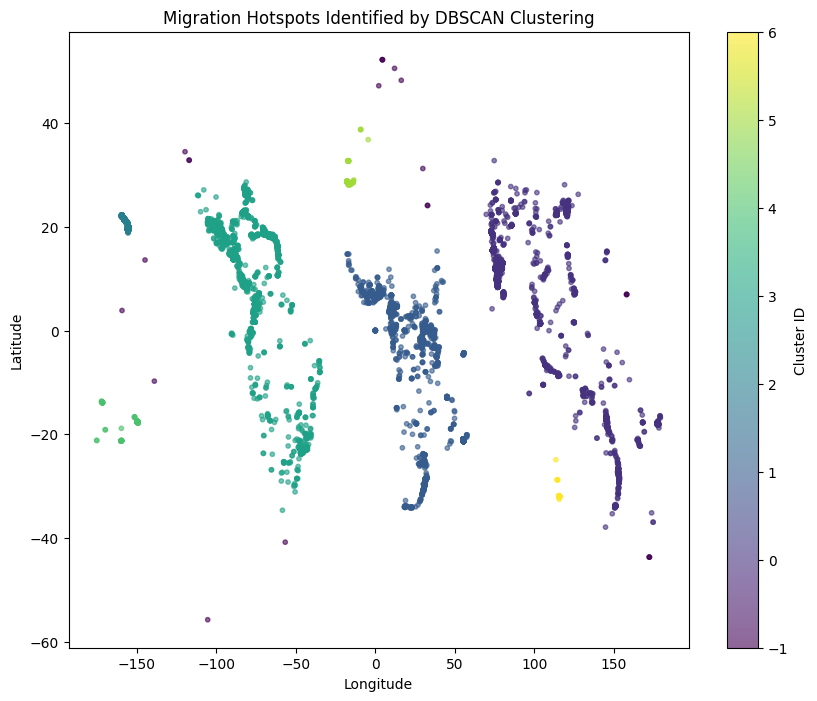

Cluster sizes: cluster
 0    4085
 3    2867
 1    1655
 2     935
 6     166
 4     131
 5      64
-1      23
Name: count, dtype: int64


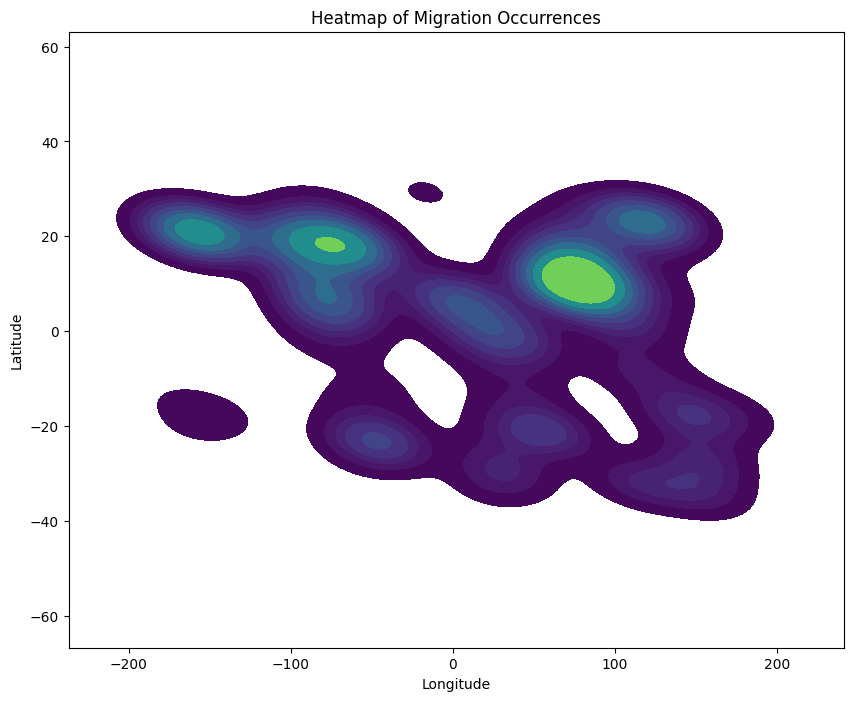

In [4]:
#geospatial clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'data_v2.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN in 'decimalLatitude' and 'decimalLongitude' for spatial analysis
data = data.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Extract latitude and longitude data for clustering
coords = data[['decimalLatitude', 'decimalLongitude']].values

## 1. Clustering Migration Hotspots with DBSCAN ##
# Standardize coordinates for clustering
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=10).fit(coords_scaled)
data['cluster'] = db.labels_  # Add cluster labels to the dataframe

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(data['decimalLongitude'], data['decimalLatitude'], c=data['cluster'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Cluster ID')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Migration Hotspots Identified by DBSCAN Clustering')
plt.show()

# Count the number of occurrences in each cluster
cluster_counts = data['cluster'].value_counts()
print("Cluster sizes:", cluster_counts)

## 2. Heatmap of Occurrences ##
plt.figure(figsize=(10, 8))
sns.kdeplot(x=data['decimalLongitude'], y=data['decimalLatitude'], cmap='viridis', fill=True, thresh=0.05)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Migration Occurrences')
plt.show()


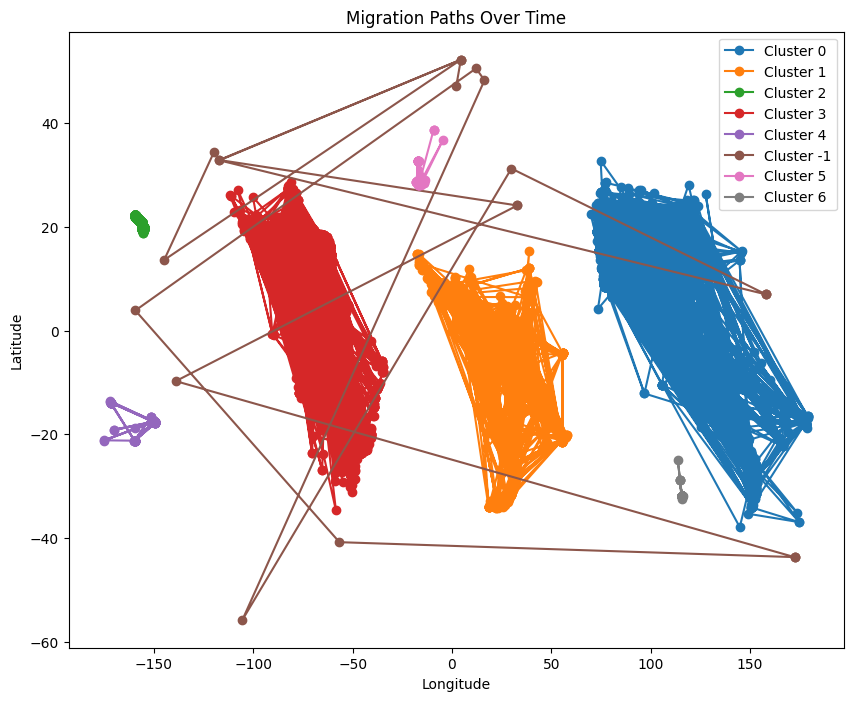

In [5]:
# line plot of migration pathway
# Assuming 'date' or 'timestamp' is available in the data
data['year'] = pd.to_datetime(data['year'])  # If you have a date column

# Sort by date to create paths
data_sorted = data.sort_values(by='year')

# Plot migration paths
plt.figure(figsize=(10, 8))
for cluster_id in data['cluster'].unique():
    cluster_data = data_sorted[data_sorted['cluster'] == cluster_id]
    plt.plot(cluster_data['decimalLongitude'], cluster_data['decimalLatitude'], marker='o', label=f'Cluster {cluster_id}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Migration Paths Over Time')
plt.legend()
plt.show()


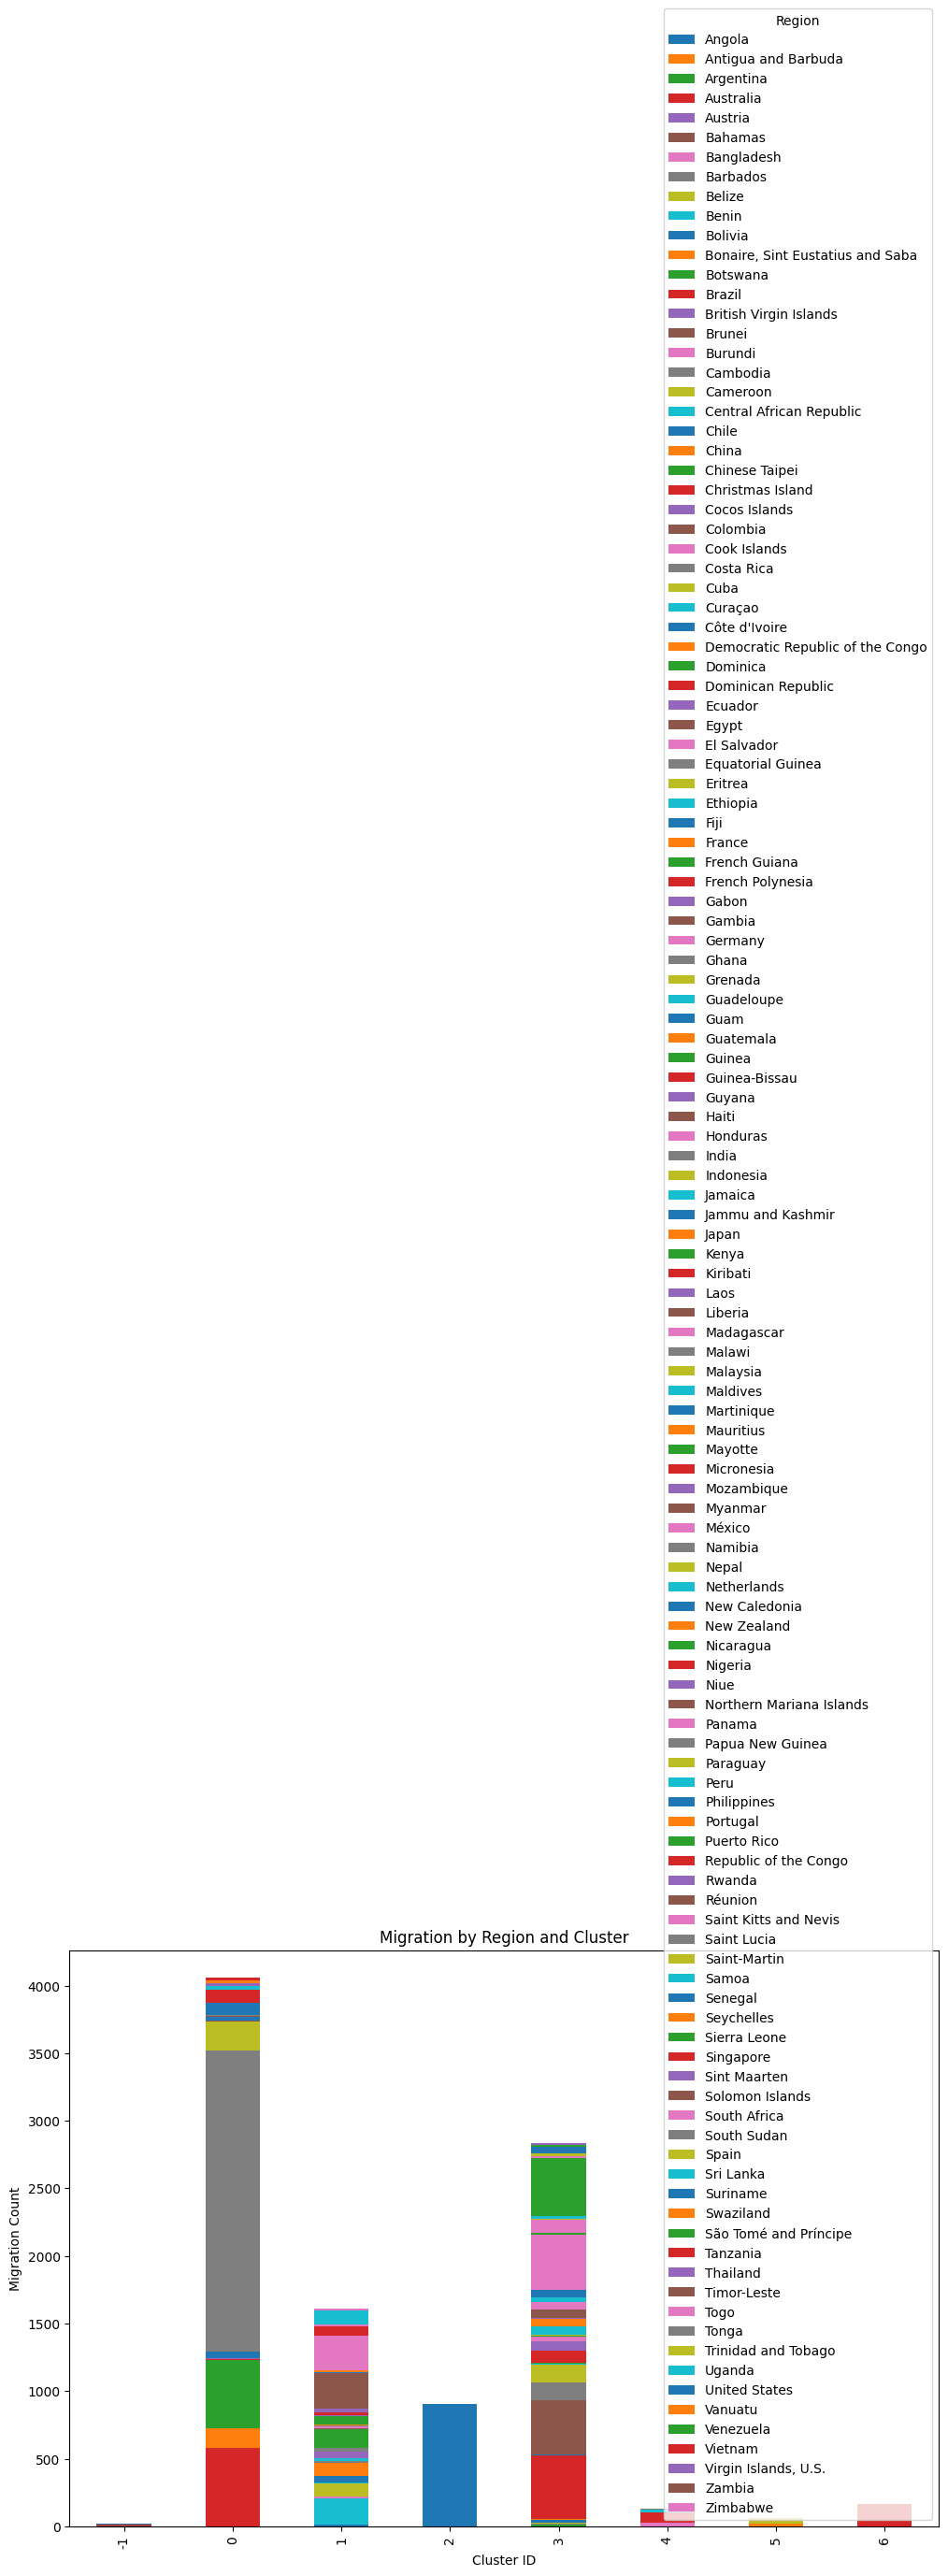

In [7]:
# Assuming there is a 'region' column
region_cluster_counts = data.groupby(['cluster', 'level0Name']).size().unstack(fill_value=0)

region_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Cluster ID')
plt.ylabel('Migration Count')
plt.title('Migration by Region and Cluster')
plt.legend(title='Region')
plt.show()



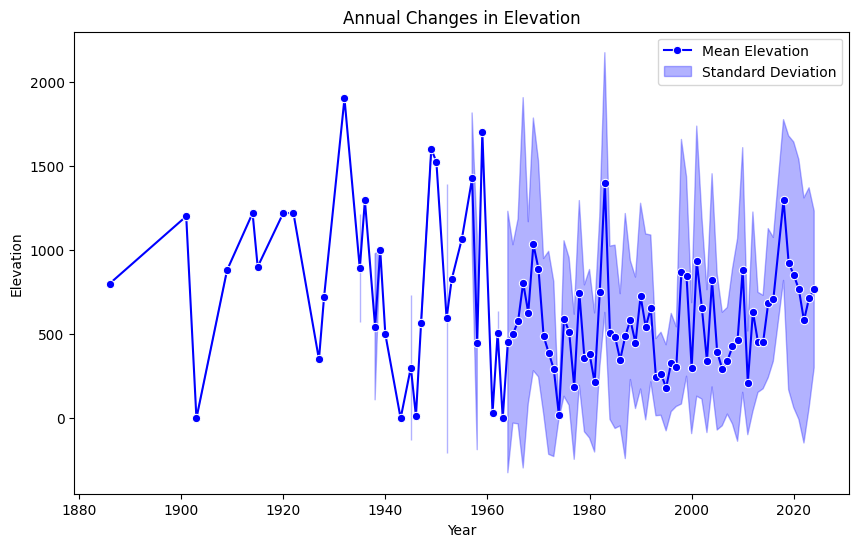

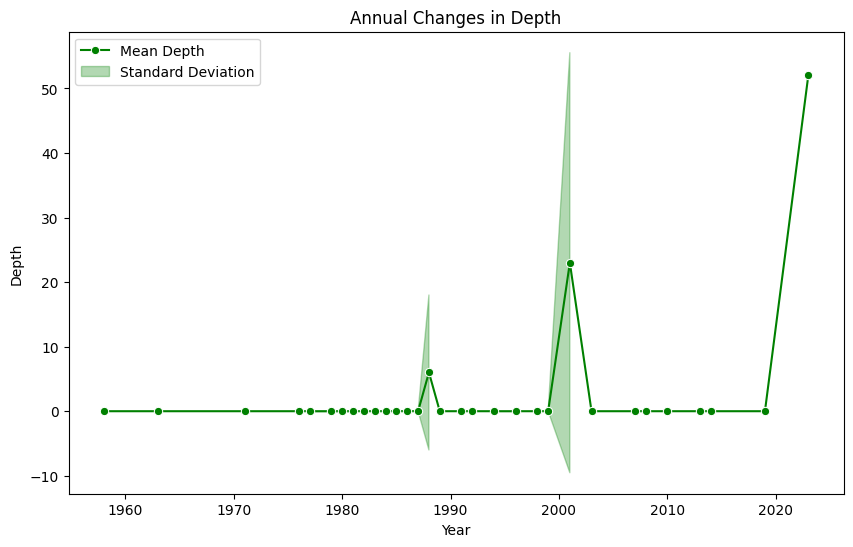

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_v2.csv'
data = pd.read_csv(file_path)

# Ensure 'year' is an integer (drop rows where 'year' is NaN)
data = data.dropna(subset=['year'])
data['year'] = data['year'].astype(int)

## 1. Seasonal/Annual Shifts in Elevation ##
# Drop rows with NaN in 'elevation' for elevation analysis
elevation_data = data.dropna(subset=['elevation'])

# Annual Elevation Trends
annual_elevation = elevation_data.groupby('year')['elevation'].agg(['mean', 'std']).reset_index()

# Plotting annual elevation trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_elevation, x='year', y='mean', marker='o', color='b', label='Mean Elevation')
plt.fill_between(annual_elevation['year'], 
                 annual_elevation['mean'] - annual_elevation['std'], 
                 annual_elevation['mean'] + annual_elevation['std'], 
                 color='b', alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Elevation')
plt.title('Annual Changes in Elevation')
plt.legend()
plt.show()

# If seasonal data is available (assuming 'month' column is present)
if 'month' in data.columns:
    # Defining seasons
    data['season'] = data['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                     'Spring' if x in [3, 4, 5] else
                                                     'Summer' if x in [6, 7, 8] else
                                                     'Fall')
    
    # Seasonal Elevation Trends
    seasonal_elevation = elevation_data.groupby(['year', 'season'])['elevation'].mean().reset_index()

    # Plotting seasonal elevation trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=seasonal_elevation, x='year', y='elevation', hue='season', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Elevation')
    plt.title('Seasonal Changes in Elevation Over Time')
    plt.legend(title='Season')
    plt.show()

## 2. Depth Analysis ##
# Drop rows with NaN in 'depth' for depth analysis
depth_data = data.dropna(subset=['depth'])

# Annual Depth Trends
annual_depth = depth_data.groupby('year')['depth'].agg(['mean', 'std']).reset_index()

# Plotting annual depth trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_depth, x='year', y='mean', marker='o', color='g', label='Mean Depth')
plt.fill_between(annual_depth['year'], 
                 annual_depth['mean'] - annual_depth['std'], 
                 annual_depth['mean'] + annual_depth['std'], 
                 color='g', alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Depth')
plt.title('Annual Changes in Depth')
plt.legend()
plt.show()


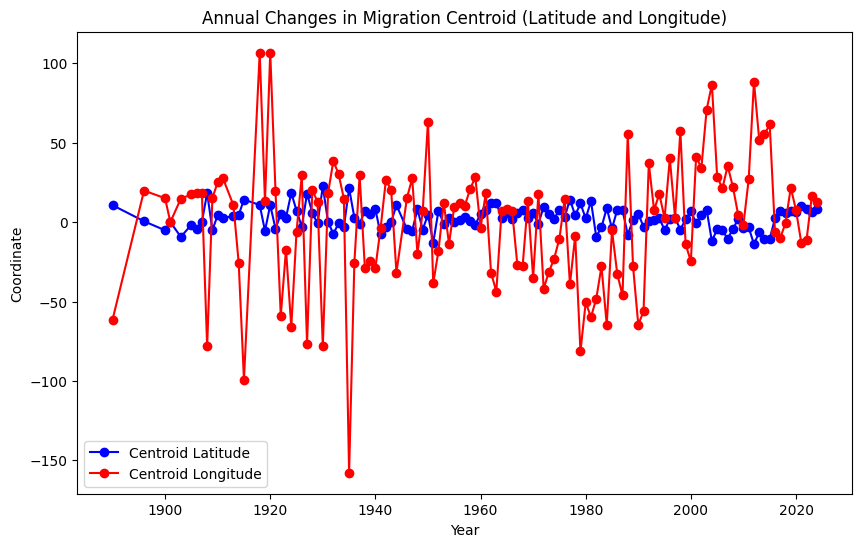

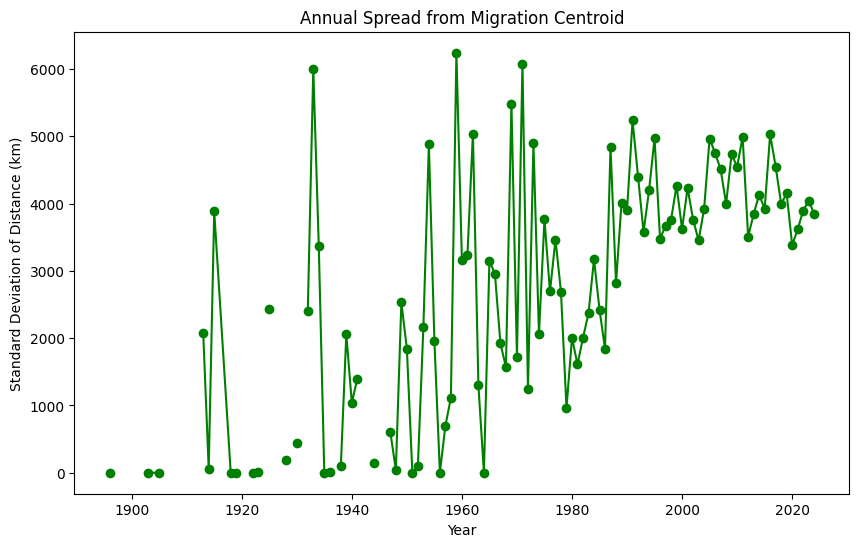

In [4]:
# centroid and spread analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Load the dataset
file_path = 'data_v2.csv'
data = pd.read_csv(file_path)

# Ensure 'year' is an integer (drop rows where 'year' is NaN)
data = data.dropna(subset=['year'])
data['year'] = data['year'].astype(int)

## 1. Changing Migration Centroid ##
# Drop rows with NaN in 'decimalLatitude' and 'decimalLongitude' for centroid analysis
lat_lon_data = data.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Calculate annual centroid
annual_centroid = lat_lon_data.groupby('year')[['decimalLatitude', 'decimalLongitude']].mean().reset_index()

# Plotting migration centroid over time
plt.figure(figsize=(10, 6))
plt.plot(annual_centroid['year'], annual_centroid['decimalLatitude'], label='Centroid Latitude', marker='o', color='b')
plt.plot(annual_centroid['year'], annual_centroid['decimalLongitude'], label='Centroid Longitude', marker='o', color='r')
plt.xlabel('Year')
plt.ylabel('Coordinate')
plt.title('Annual Changes in Migration Centroid (Latitude and Longitude)')
plt.legend()
plt.show()

## 2. Spread from Centroid Over Time ##
# Calculate distance from centroid for each occurrence and compute the annual standard deviation
def calculate_distance(row, centroid):
    return geodesic((row['decimalLatitude'], row['decimalLongitude']), centroid).kilometers

spread_data = []
for year, group in lat_lon_data.groupby('year'):
    centroid = (group['decimalLatitude'].mean(), group['decimalLongitude'].mean())
    group['distance_from_centroid'] = group.apply(lambda row: calculate_distance(row, centroid), axis=1)
    spread_data.append([year, group['distance_from_centroid'].std()])

spread_df = pd.DataFrame(spread_data, columns=['year', 'std_dev_distance'])

# Plotting spread from centroid over time
plt.figure(figsize=(10, 6))
plt.plot(spread_df['year'], spread_df['std_dev_distance'], marker='o', color='g')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Distance (km)')
plt.title('Annual Spread from Migration Centroid')
plt.show()


/tmp/ipykernel_4381/2949959909.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gbif_region_counts, x='gbifRegion', y='count', palette='viridis')


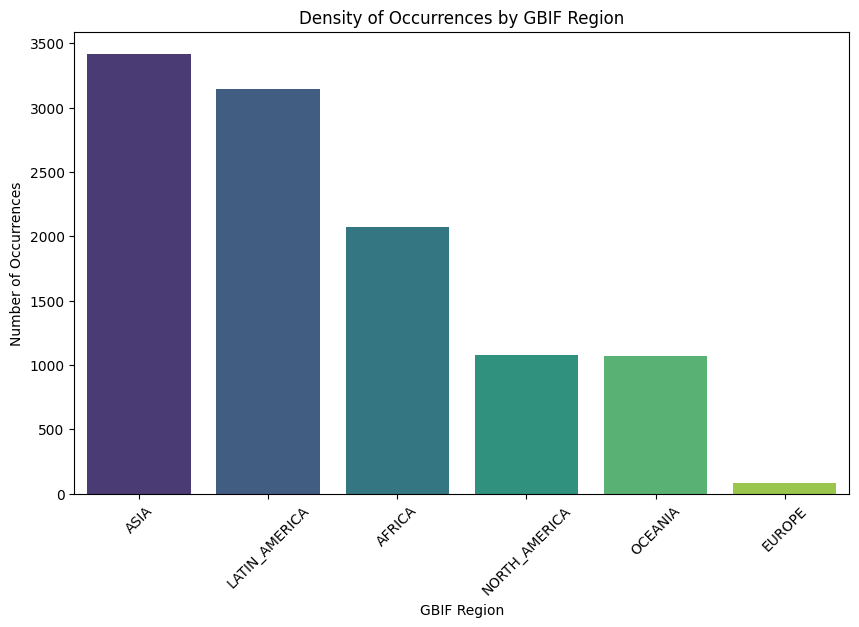

/tmp/ipykernel_4381/2949959909.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_counts, x='continent', y='count', palette='plasma')


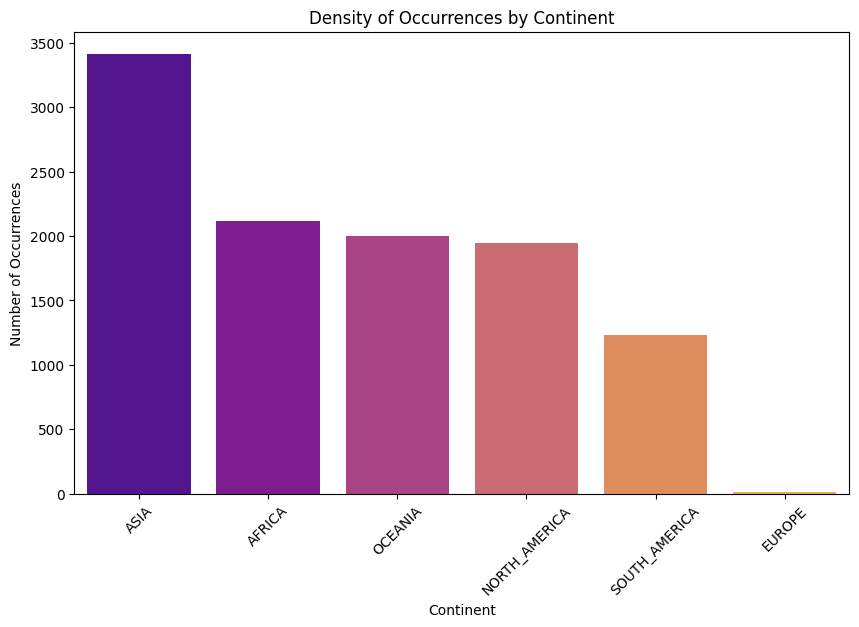

ValueError: Could not interpret value `country` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [6]:
## 3. Region-Specific Density Analysis (GBIF Region) ##
# Drop rows with NaN in 'gbifRegion' for GBIF region density analysis
gbif_data = data.dropna(subset=['gbifRegion'])

# Count occurrences by GBIF region
gbif_region_counts = gbif_data['gbifRegion'].value_counts().reset_index()
gbif_region_counts.columns = ['gbifRegion', 'count']

# Plot GBIF region density
plt.figure(figsize=(10, 6))
sns.barplot(data=gbif_region_counts, x='gbifRegion', y='count', palette='viridis')
plt.xlabel('GBIF Region')
plt.ylabel('Number of Occurrences')
plt.title('Density of Occurrences by GBIF Region')
plt.xticks(rotation=45)
plt.show()

## 4. Comparison by Continent and Country ##
# Drop rows with NaN in 'continent' and 'country' for continent and country density analysis
continent_data = data.dropna(subset=['continent'])
country_data = data.dropna(subset=['countryCode'])

# Count occurrences by continent
continent_counts = continent_data['continent'].value_counts().reset_index()
continent_counts.columns = ['continent', 'count']

# Plot continent density
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_counts, x='continent', y='count', palette='plasma')
plt.xlabel('Continent')
plt.ylabel('Number of Occurrences')
plt.title('Density of Occurrences by Continent')
plt.xticks(rotation=45)
plt.show()

# Count occurrences by country
country_counts = country_data['countryCode'].value_counts().nlargest(10).reset_index()  # Top 10 countries
country_counts.columns = ['countryCode', 'count']

# Plot country density
plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts, x='country', y='count', palette='magma')
plt.xlabel('Country')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Countries by Occurrence Density')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_4381/2647634332.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=infraspecific_elevation, x='infraspecificEpithet', y='elevation', palette='viridis')


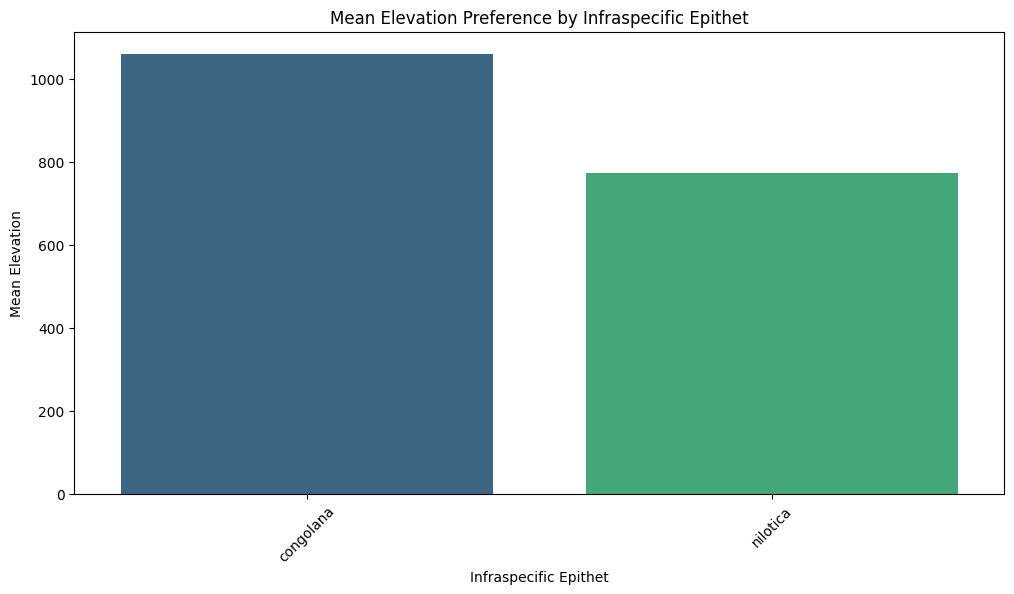

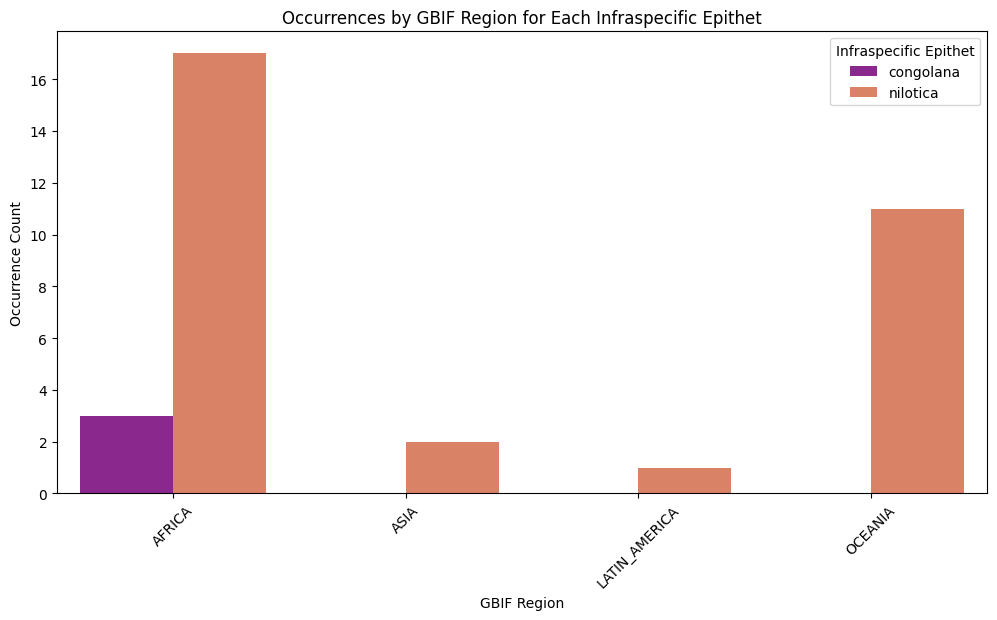

In [7]:
# taxonomic specific analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_v2.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN in 'infraspecificEpithet', 'elevation', 'gbifRegion' for analysis
infraspecific_data = data.dropna(subset=['infraspecificEpithet', 'elevation', 'gbifRegion'])

# Group by infraspecific epithet and calculate mean elevation and occurrence by GBIF region
infraspecific_elevation = infraspecific_data.groupby('infraspecificEpithet')['elevation'].mean().reset_index()
infraspecific_region_counts = infraspecific_data.groupby(['infraspecificEpithet', 'gbifRegion']).size().reset_index(name='count')

# Plotting elevation preferences for infraspecific epithets
plt.figure(figsize=(12, 6))
sns.barplot(data=infraspecific_elevation, x='infraspecificEpithet', y='elevation', palette='viridis')
plt.xlabel('Infraspecific Epithet')
plt.ylabel('Mean Elevation')
plt.title('Mean Elevation Preference by Infraspecific Epithet')
plt.xticks(rotation=45)
plt.show()

# Plotting occurrences by GBIF region for each infraspecific epithet
plt.figure(figsize=(12, 6))
sns.barplot(data=infraspecific_region_counts, x='gbifRegion', y='count', hue='infraspecificEpithet', palette='plasma')
plt.xlabel('GBIF Region')
plt.ylabel('Occurrence Count')
plt.title('Occurrences by GBIF Region for Each Infraspecific Epithet')
plt.legend(title='Infraspecific Epithet')
plt.xticks(rotation=45)
plt.show()


In [8]:
# migration and speed analysis
import numpy as np
from geopy.distance import geodesic

# Sort data by 'year' for each unique identifier
data = data.sort_values(by=['identifier', 'year'])

# Drop rows with NaN in 'decimalLatitude' and 'decimalLongitude'
migration_data = data.dropna(subset=['identifier', 'decimalLatitude', 'decimalLongitude'])

# Calculating yearly migration distance for each identifier
migration_data['previous_lat'] = migration_data.groupby('identifier')['decimalLatitude'].shift(1)
migration_data['previous_lon'] = migration_data.groupby('identifier')['decimalLongitude'].shift(1)
migration_data['previous_year'] = migration_data.groupby('identifier')['year'].shift(1)

# Calculate distance and direction of migration
def calculate_migration_metrics(row):
    if pd.notnull(row['previous_lat']) and pd.notnull(row['previous_lon']):
        prev_point = (row['previous_lat'], row['previous_lon'])
        curr_point = (row['decimalLatitude'], row['decimalLongitude'])
        distance = geodesic(prev_point, curr_point).kilometers
        angle = np.degrees(np.arctan2(row['decimalLongitude'] - row['previous_lon'], row['decimalLatitude'] - row['previous_lat']))
        return pd.Series({'distance_km': distance, 'angle_degrees': angle})
    return pd.Series({'distance_km': np.nan, 'angle_degrees': np.nan})

migration_data[['distance_km', 'angle_degrees']] = migration_data.apply(calculate_migration_metrics, axis=1)

# Calculate average migration distance per year
annual_migration = migration_data.groupby('year')['distance_km'].mean().reset_index()

# Plotting average migration distance per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_migration, x='year', y='distance_km', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Average Migration Distance (km)')
plt.title('Average Migration Distance per Year')
plt.show()

# Plotting migration direction angles
plt.figure(figsize=(10, 6))
sns.histplot(migration_data['angle_degrees'].dropna(), bins=30, kde=True, color='purple')
plt.xlabel('Migration Direction (Degrees)')
plt.ylabel('Frequency')
plt.title('Migration Direction Analysis')
plt.show()


KeyError: 'identifier'

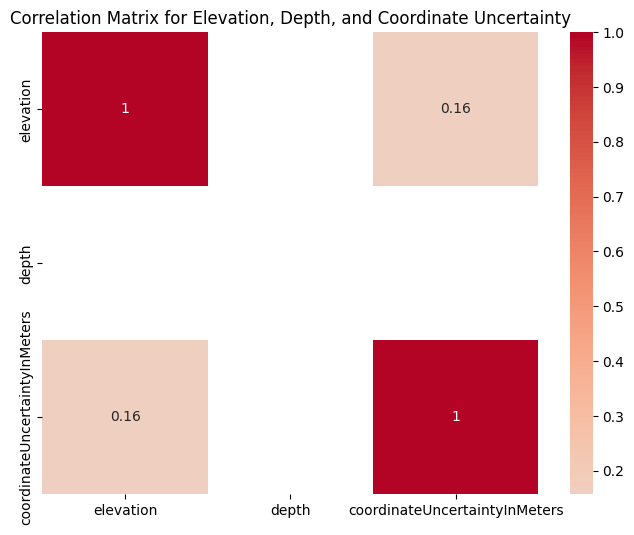

/tmp/ipykernel_4381/2646206582.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_uncertainty, x='gbifRegion', y='mean', palette='magma')


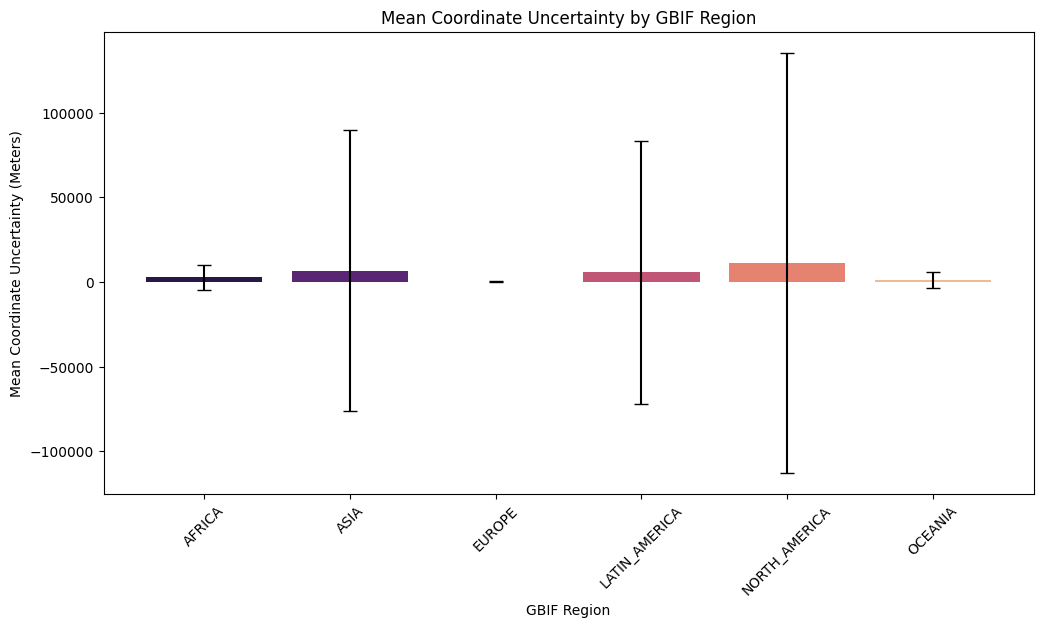

In [9]:
# environmental correlations
# Drop rows with NaN in 'elevation', 'depth', and 'coordinateUncertaintyInMeters'
env_data = data.dropna(subset=['elevation', 'depth', 'coordinateUncertaintyInMeters'])

# Calculate correlation matrix
correlation_matrix = env_data[['elevation', 'depth', 'coordinateUncertaintyInMeters']].corr()

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Elevation, Depth, and Coordinate Uncertainty')
plt.show()

## Detailed Analysis of Coordinate Uncertainty Patterns ##
# Group by GBIF region and calculate mean and standard deviation of coordinate uncertainty
region_uncertainty = data.groupby('gbifRegion')['coordinateUncertaintyInMeters'].agg(['mean', 'std']).reset_index()

# Plotting coordinate uncertainty by GBIF region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_uncertainty, x='gbifRegion', y='mean', palette='magma')
plt.errorbar(x=range(len(region_uncertainty)), y=region_uncertainty['mean'], yerr=region_uncertainty['std'], fmt='none', color='black', capsize=5)
plt.xlabel('GBIF Region')
plt.ylabel('Mean Coordinate Uncertainty (Meters)')
plt.title('Mean Coordinate Uncertainty by GBIF Region')
plt.xticks(rotation=45)
plt.show()
